<a href="https://colab.research.google.com/github/pallucs/Basic-neuralnet-train/blob/main/Basic_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
rg = np.random.default_rng()

#Create random data and values for calculation

def generate_data(n_features,n_values):
  features = rg.random((n_features,n_values))
  weights = rg.random((1,n_values))[0]
  targets = np.random.choice([0,1], n_features)
  data = pd.DataFrame(features, columns=['x0', 'x1', 'x2'])
  data['targets'] = targets
  return data, weights

************************
epoch 0
0.5054591004332524
************************
epoch 1
0.4294038318570631
************************
epoch 2
0.37597196873917105
************************
epoch 3
0.3408510713769083
************************
epoch 4
0.31881494010436706
************************
epoch 5
0.3053542349510807
************************
epoch 6
0.29722786244321475
************************
epoch 7
0.2923300768425986
************************
epoch 8
0.28936310373045343
************************
epoch 9
0.2875468185997606
************************
epoch 10
0.2864167925765924
************************
epoch 11
0.28569706266869555
************************
epoch 12
0.2852233754988221
************************
epoch 13
0.2848976777981335
************************
epoch 14
0.2846612597672797
************************
epoch 15
0.2844788847729615
************************
epoch 16
0.28432937418070625
************************
epoch 17
0.2841999953726028
************************
epoch 18
0.28408310146766

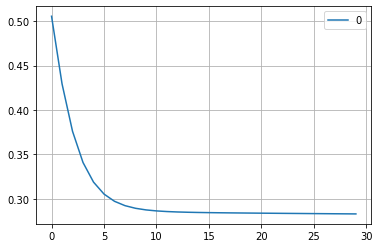

In [3]:
#calculate the weighted sum

bias = 0.5
l_rate = 0.01
epochs = 30
epoch_loss = []


data, weights = generate_data(50,3)

def train_model(data, weights, bias, l_rate, epochs):
  for e in range(epochs):
    individual_loss = []

    for i in range(len(data)):
      feature = data.loc[i][:-1].to_numpy()
      target = data.loc[i][-1]
      w_sum =  generate_weighted_sum(feature, weights, bias)
      prediction = sigmoid(w_sum)
      loss = cross_entropy_loss(target, prediction)
      individual_loss.append(loss)
      #GRADIENT DESCENT

      weights = update_weights(weights, l_rate, target, prediction, feature)
      bias = update_bias(bias, l_rate, target, prediction)

    average_loss = sum(individual_loss)/ len(individual_loss)
    epoch_loss.append(average_loss)
    print('************************')
    print('epoch', e)
    print(average_loss)


def generate_weighted_sum(feature, weights, bias):
  return np.dot(feature, weights) + bias

def sigmoid(w_sum):
  return 1/(1+np.exp(-w_sum))

def cross_entropy_loss(target, prediction):
  return -(target * np.log10(prediction) + (1-target) * np.log10(1-prediction))

def update_weights(weights, l_rate, target, prediction, feature):
  new_weights = []
  for x,w in zip(feature, weights):
    new_w = w + l_rate*(target-prediction)*x
    new_weights.append(new_w)
  return new_weights

def update_bias(bias, l_rate, target, prediction):
  return bias + l_rate*(target - prediction)

train_model(data, weights, bias, l_rate, epochs)

#PLOT THE AVERAGE LOSS CURVE

df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind='line', grid=True).get_figure()
df_plot.savefig('Training_Loss.pdf')

